# エッジ検出器
参考: http://www.mi.t.u-tokyo.ac.jp/harada/lectures/IIT/internal/04_detector_descriptor_20160511.pdf


![特徴量](Figs/features.png "特徴量のいろいろ")  青い囲みが平坦領域、黒く囲ったところがエッジ、赤く囲ったところがコーナー
* 平坦領域: 小領域を微小移動させても小領域内の画素値の変化は少ない
* エッジ(縁):　小領域をエッジに沿って微小移動させても小領域内の画素値の変化は少ないが、エッジに垂直方向に微小移動させると変化が大きい
* コーナー(角): 小領域をどの方向に微小移動させても小領域内の画素値は変化する

## １次微分によるエッジ検出

画像認識ではデジタル画像を扱うため、離散系で「微分」を考える⇒差分式

### (1) Prewittフィルタ

注目画素の周辺の画素値の微分も計算し、それらの平均を用いる方法

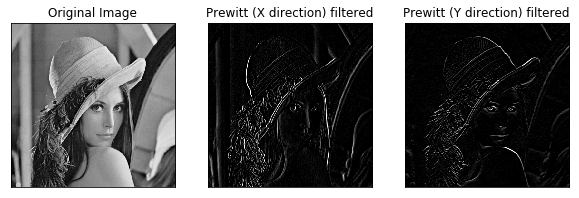

In [4]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Figs/lenna.png',0)
# カーネル（縦方向の輪郭検出用）
kernel_x = np.array([[-1, 0, 1],
                       [-1, 0, 1],
                       [-1, 0, 1]])

# カーネル（横方向の輪郭検出用）
kernel_y = np.array([[-1,-1, -1],
                       [0, 0, 0],
                       [1, 1, 1]])

plt.figure(figsize=(10,7))
# 原画像とカーネルサイズを変えたフィルタをかけた画像を並べて見比べる
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

prewittX = cv2.filter2D(img,-1,kernel_x) 
plt.subplot(132),plt.imshow(prewittX,cmap = 'gray')
plt.title('Prewitt (X direction) filtered'), plt.xticks([]), plt.yticks([])

prewittY= cv2.filter2D(img,-1,kernel_y) 
plt.subplot(133),plt.imshow(prewittY,cmap = 'gray')
plt.title('Prewitt (Y direction) filtered'), plt.xticks([]), plt.yticks([])

plt.show()

### (2) Sobelフィルタ

注目画素を重要視する

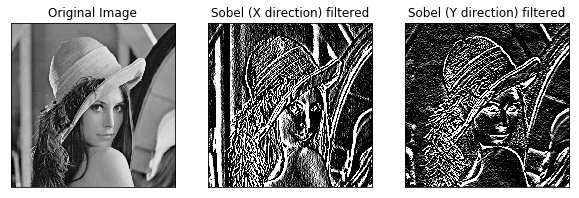

In [9]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Figs/lenna.png',0)
# 縦方向の輪郭検出（第３引数が１，第４引数が０）、ksizeでカーネルサイズを指定
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# 横方向の輪郭検出（第３引数が０，第４引数が１）
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)

plt.figure(figsize=(10,7))
# 原画像とカーネルサイズを変えたフィルタをかけた画像を並べて見比べる
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

img_out = cv2.filter2D(img,-1,kernel_x) 
plt.subplot(132),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel (X direction) filtered'), plt.xticks([]), plt.yticks([])

img_out = cv2.filter2D(img,-1,kernel_y) 
plt.subplot(133),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel (Y direction) filtered'), plt.xticks([]), plt.yticks([])

plt.show()

cv2.Sobel関数の第２引数に出力の型を指定する。cv2.CV_8Uという指定の場合、黒から白への変化(画素値の低い値から高い値への変化)は正方向の傾きとして計算されるが，白から黒への変化(画素値の高い値から低い値への変化)は負の傾きとして計算される．そのため，cv2.CV_8Uという指定では負の値は全て0になってしまう、つまり，負の勾配を失ってしまうという問題がある．

そこで、cv2.CV_64Fという型を指定する。ただしこの場合は、「負」は『負』のままなので、値の変化の絶対値を計算するためnp.absoluteを用いている。

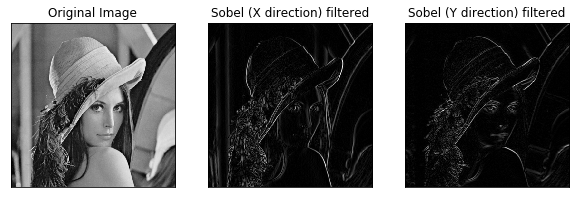

In [8]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Figs/lenna.png',0)
# 縦方向の輪郭検出（第３引数が１，第４引数が０）、ksizeでカーネルサイズを指定
sobelx = np.absolute(cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5))

# 横方向の輪郭検出（第３引数が０，第４引数が１）
sobely = np.absolute(cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5))

plt.figure(figsize=(10,7))
# 原画像とカーネルサイズを変えたフィルタをかけた画像を並べて見比べる
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

img_out = cv2.filter2D(img,-1,kernel_x) 
plt.subplot(132),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel (X direction) filtered'), plt.xticks([]), plt.yticks([])

img_out = cv2.filter2D(img,-1,kernel_y) 
plt.subplot(133),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel (Y direction) filtered'), plt.xticks([]), plt.yticks([])

plt.show()

比較のため、np.absoluteを用いない場合は次のようになる:

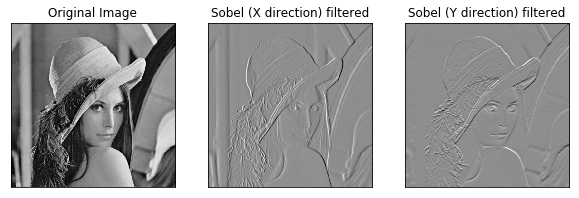

In [10]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Figs/lenna.png',0)
# 縦方向の輪郭検出（第３引数が１，第４引数が０）、ksizeでカーネルサイズを指定
sobelx = (cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5))

# 横方向の輪郭検出（第３引数が０，第４引数が１）
sobely = (cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5))

plt.figure(figsize=(10,7))
# 原画像とカーネルサイズを変えたフィルタをかけた画像を並べて見比べる
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

img_out = cv2.filter2D(img,-1,kernel_x) 
plt.subplot(132),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel (X direction) filtered'), plt.xticks([]), plt.yticks([])

img_out = cv2.filter2D(img,-1,kernel_y) 
plt.subplot(133),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel (Y direction) filtered'), plt.xticks([]), plt.yticks([])

plt.show()

### (3) Canny エッジ検出器

広く使われるエッジ検出器

ガウシアンフィルタによって画像を平滑化した後、ソーベルフィルタによって縦方向($G_y$)と横方向($G_x$)の1次微分を取得する．これら2つの微分画像から以下のようにエッジの勾配と方向を求める:

$Edge\_Gradient(G) = \sqrt{G_x^2 + G_y^2} $

$Angle(\theta) = \tan^{-1} \left( \frac{G_y}{G_x} \right)$
勾配の方向と強度を計算した後は，エッジと関係ない画素を取り除く．具体的には，各画素に対してその画素が勾配方向に対して極大値であるかどうかを確認する.
こうして検出されたエッジをさらに，本当のエッジとそうでないものに分類する．この分類のため， minVal と maxVal という二つの閾値を用いる．微分値が maxVal 以上のエッジは本当のエッジとされ， minVal 以下の値であればエッジではないとみなされ、取り除かれる．微分値が二つのしきい値の間の場合は，本当のエッジとそうでないエッジとの隣接関係を基に分類される．つまり、本当のエッジと分類された画素につながっていれば本当のエッジ、そうでなければエッジではない画素とみなす


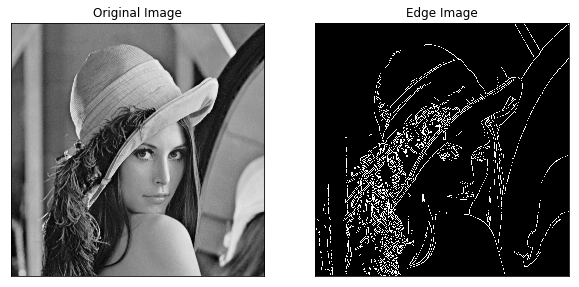

In [25]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Figs/lenna.png',0)
edges = cv2.Canny(img,70,170) # 第２引数(minVal)と第３引数(maxVal)の値でエッジの絞り込みを行う

plt.figure(figsize=(10,7))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## 2次微分によるエッジ検出
### (1) ラプラシアン(Laplacian): 連続系のx方向、y方向の２次微分の和

ラプラシアン・カーネル: ${\bf F} = \left( \begin{array}{ccc} 0 & 1 & 0 \\ 1 & -4 & 1\\ 0 & 1 & 0 \end{array}\right)$
斜め方向も考慮すると： ${\bf F} = \left( \begin{array}{ccc} 1 & 1 & 1 \\ 1 & -8& 1\\ 1 & 1 & 1 \end{array}\right)$

ノイズも検出してしまう。そのためノイズ除去が必要

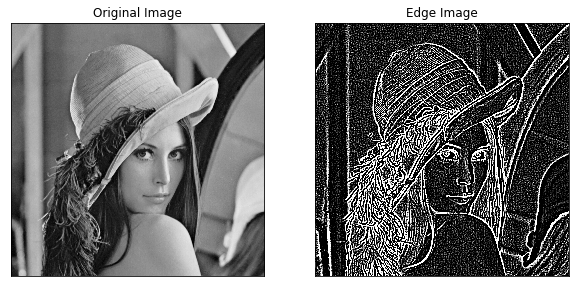

In [20]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Figs/lenna.png',0)
edges=cv2.Laplacian(img,-1,ksize=5) # 5x5フィルタ

plt.figure(figsize=(10,7))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### (2) ラプラシアン・ガウシアンフィルタ(LoG, Laplacian of Gaussian filter)

  OpenCVにはこのための関数はないので、GaussianしてからLaplacianする

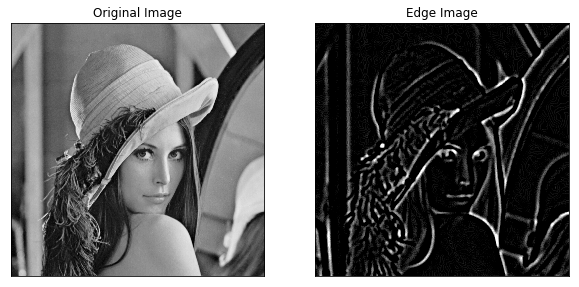

In [21]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Figs/lenna.png',0)
gaussian = cv2.GaussianBlur(img,(0,0),3,3) # sigma_x = sigma_y = 3
edges=cv2.Laplacian(gaussian,-1,ksize=5) # 5x5フィルタ

plt.figure(figsize=(10,7))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()